In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [5]:
def compile_and_train(model):
    optimizer = keras.optimizers.AdamW(learning_rate=0.001)

    early_stop = keras.src.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    lr_schedule = keras.src.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[lr_schedule, early_stop], # Learning rate scheduling & early stop
        verbose=1,
    )
    return history

In [7]:
model_1 = keras.Sequential(
    [
        keras.layers.Input(shape=(784,)),

        keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(1e-5)),
        keras.layers.Activation("relu"),

        keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(1e-5)),
        keras.layers.Activation("relu"),

        keras.layers.Dense(10, activation="softmax"),
    ]
)

model_2 = keras.Sequential(
    [
        keras.layers.Input(shape=(784,)),
        keras.layers.GaussianNoise(0.1),

        keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l1(1e-5)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(1e-5)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("relu"),
        keras.layers.Dropout(0.1),

        keras.layers.Dense(10, activation="softmax"),
    ]
)

In [8]:
history_1 = compile_and_train(model_1)
history_2 = compile_and_train(model_2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8624 - loss: 0.4947 - val_accuracy: 0.9661 - val_loss: 0.1293 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9677 - loss: 0.1136 - val_accuracy: 0.9671 - val_loss: 0.1178 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9800 - loss: 0.0738 - val_accuracy: 0.9722 - val_loss: 0.0961 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9877 - loss: 0.0506 - val_accuracy: 0.9745 - val_loss: 0.0898 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9913 - loss: 0.0397 - val_accuracy: 0.9770 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9935 - loss: 0.0330 - val_accuracy: 0.9762 - val_loss: 0.0978 - learning_rate: 0.0010
Epoch 7/50
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9955 - loss: 0.027

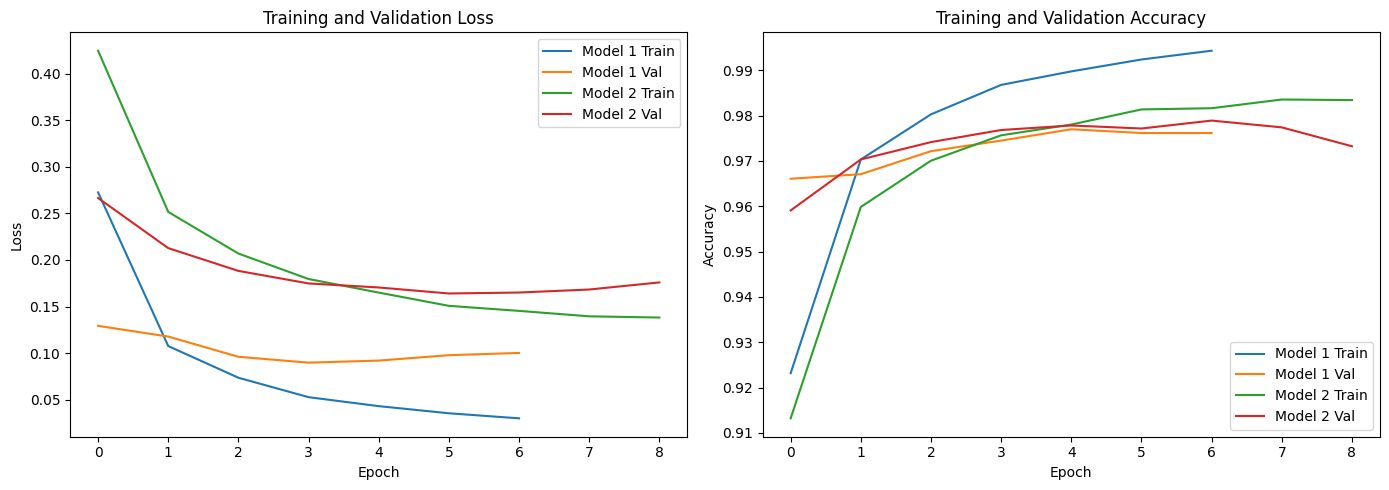

In [9]:
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history([history_1, history_2], ["Model 1", "Model 2"])

In [10]:
test_loss_a, test_acc_a = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_b, test_acc_b = model_2.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_acc_a:.4f}, Test Loss: {test_loss_a:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_b:.4f}, Test Loss: {test_loss_b:.4f}")

Model 1 - Test Accuracy: 0.9802, Test Loss: 0.0783
Model 2 - Test Accuracy: 0.9802, Test Loss: 0.1500
